In [833]:
# python modules
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# my module for creating L-layered Neural Network
import sequence_utils

### load and prepare data

In [834]:
digits = load_digits()
print(np.unique(digits.target))
data = digits.data
print(np.unique(data))
target = digits.target.reshape(data.shape[0], 1)

# scale the feature value(digits.data) between 0 to 1 instead of 0 to 16
data = data / 16

# create training & test data set
X_train, X_test, Y_train, Y_test = train_test_split(data, target, 
                                                    test_size = 0.1, random_state = 0)

"""
Dimension of input(X) and y(output) should be as follows:
X:= (features, samples). i.e. if input has 1000 samples with 64 features in each sample,
X should be arranged in (64, 1000) matrix. If input is provided in (1000, 64), 
then transpose it.

Y:= (1, samples). Similar to X, each output should be stacked column-wise.
"""
print(f'Before Transpose: X: {X_train.shape}, y: {Y_train.shape}')
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

print(f'After Transpose: X: {X_train.shape}, y: {Y_train.shape}')

"""
Currently, Y_train and Y_test are of (1, train_sample_size) and (1, test_sample_size).
However, we know that it takes a value from 0 to 9. Therefore, we would need to convert
these labels (Y's) to (10, train_sample_size) and (10, test_sample_size).

Here, each row will for the matrix will contain one 1 and rest 0, with 1 denoting the index
for the actual label value.
"""
m_train = Y_train.shape[1]
Y_train_temp = np.zeros((10, m_train))
for i in range(m_train):
    Y_train_temp[Y_train[0, i], i] = 1
Y_train = Y_train_temp
    
m_test = Y_test.shape[1]
Y_test_temp = np.zeros((10, m_test))
for i in range(m_test):
    Y_test_temp[Y_test[0, i], i] = 1
Y_test = Y_test_temp

print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')
    
# print(Y[:, 0:5])
# print(Y_train[:, 0:5])


[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Before Transpose: X: (1617, 64), y: (1617, 1)
After Transpose: X: (64, 1617), y: (1, 1617)
X_train: (64, 1617), Y_train: (10, 1617)
X_test: (64, 180), Y_test: (10, 180)


### analyze data

In [836]:
"""
This method takes parameter values from 0 to 1796
"""
def print_details(sample_id):
    x = X_train[:, sample_id].reshape(8, 8)
    y = Y_train[:, sample_id]
    print(f'X: {x},\n y: {y}')
    plt.gray()
    plt.matshow(x)
    plt.show()

X: [[0.     0.     0.     0.5625 0.9375 0.125  0.     0.    ]
 [0.     0.     0.3125 1.     0.6875 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.0625 0.     0.     0.    ]
 [0.     0.125  1.     0.6875 0.     0.     0.     0.    ]
 [0.     0.125  1.     0.6875 0.25   0.25   0.     0.    ]
 [0.     0.125  0.9375 1.     1.     0.875  0.625  0.0625]
 [0.     0.     0.5625 1.     0.4375 0.1875 0.9375 0.375 ]
 [0.     0.     0.     0.4375 0.9375 1.     1.     0.375 ]],
 y: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

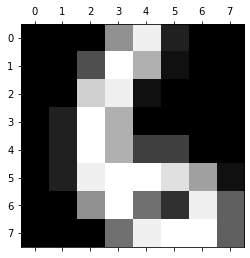

In [837]:
# print details of any sample out of the available samples
print_details(180)

### initialize weights and bias

In [838]:
layers = [64, 12, 8, 10]
W, b = initialize_parameters(layers)

for l in range(len(layers) - 1):
    print(f'layer {l}: W: {W[l].shape}, b: {b[l].shape}')

layer 0: W: (12, 64), b: (12, 1)
layer 1: W: (8, 12), b: (8, 1)
layer 2: W: (10, 8), b: (10, 1)


### forward propagation

In [839]:
AL, caches = forward_prop(X_train, W, b)
print(f'Output: {AL.shape}, cache length: {len(caches)}')
print('==================')
for layer in range(3):
    il, wl, bl, zl = caches[layer]
    print(f'layer {layer}: input: {il.shape}, w: {wl.shape}, b: {bl.shape}, z: {zl.shape}')

Output: (10, 1617), cache length: 3
layer 0: input: (64, 1617), w: (12, 64), b: (12, 1), z: (12, 1617)
layer 1: input: (12, 1617), w: (8, 12), b: (8, 1), z: (8, 1617)
layer 2: input: (8, 1617), w: (10, 8), b: (10, 1), z: (10, 1617)


### cost function

In [840]:
cost = compute_cost(AL, Y_train)
cost

6.93147952279232

### back propagation

In [841]:
grads = back_prop(AL, Y_train, caches)
L = len(grads)
for l in range(L):
    dA_prev, dW, db = grads[l]
    print(f'layer {l}: dA_prev: {dA_prev.shape}, dW: {dW.shape}, db: {db.shape}')

layer 0: dA_prev: (64, 1617), dW: (12, 64), db: (12, 1)
layer 1: dA_prev: (12, 1617), dW: (8, 12), db: (8, 1)
layer 2: dA_prev: (8, 1617), dW: (10, 8), db: (10, 1)


### update parameters

In [842]:
W, b = update_parameters(W, b, grads, 0.1)
for l in range(len(grads)):
    print(f'W: {W[l].shape}, b: {b[l].shape}')

W: (12, 64), b: (12, 1)
W: (8, 12), b: (8, 1)
W: (10, 8), b: (10, 1)


### bringing everything together

In [843]:
def L_layer_model(X, Y, layers, learning_rate = 0.0075, num_iterations = 50000):
    costs = []
    L = len(layers) - 1
    W, b = initialize_parameters(layers)
    
    for i in range(num_iterations):
        # forward propagation
        AL, caches = forward_prop(X, W, b)
        # compute cost
        cost = compute_cost(AL, Y)
        # backward propagation
        grads = back_prop(AL, Y, caches)
        # update parameters
        W, b = update_parameters(W, b, grads, learning_rate)
        
        if i % 1000 == 0:
            print(f'Cost after iteration {i}: {cost}')
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning Rate: ' + str(learning_rate))
    plt.show()
    
    return W, b

Cost after iteration 0: 6.9314783295317115
Cost after iteration 1000: 3.4223525742136913
Cost after iteration 2000: 3.250489373864793
Cost after iteration 3000: 3.2503117327431537
Cost after iteration 4000: 3.250115759102092
Cost after iteration 5000: 3.2498572924934166
Cost after iteration 6000: 3.2494600564563165
Cost after iteration 7000: 3.248762607802764
Cost after iteration 8000: 3.2473755701370735
Cost after iteration 9000: 3.2441887497061535
Cost after iteration 10000: 3.2350317228870433
Cost after iteration 11000: 3.195024364752964
Cost after iteration 12000: 3.0455655792769734
Cost after iteration 13000: 2.858243573202628
Cost after iteration 14000: 2.771159316224039
Cost after iteration 15000: 2.7148744703471306
Cost after iteration 16000: 2.674270174503495
Cost after iteration 17000: 2.6416504707608413
Cost after iteration 18000: 2.6084614326961635
Cost after iteration 19000: 2.5636243267417864
Cost after iteration 20000: 2.485889232109282
Cost after iteration 21000: 2.4003

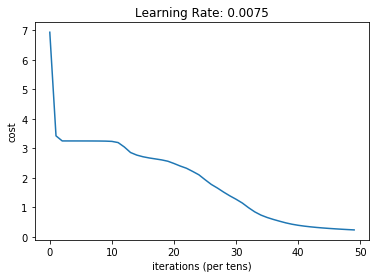

In [844]:
layers = [64, 12, 8, 10]
W, b = L_layer_model(X_train, Y_train, layers)

### predict

In [782]:
def predict_L_layer(X, W, b):
    AL, caches = forward_prop(X, W, b)
    prediction = np.argmax(AL, axis = 0)
    return prediction.reshape(1, prediction.shape[0])

def calculate_accuracy(Y_actual, Y_predicted):
    print(f'Y: {Y_actual.shape}, Predicted: {Y_predicted.shape}')
    Y_temp = np.argmax(Y_actual, axis = 0) # convert (10, m) matrix to (1, m) matrix
    Y_actual = Y_temp.reshape(1, Y_temp.shape[0])  # bring it to same dimension as Y_predicted
    return np.sum(Y_predicted == Y_actual) / Y_predicted.shape[1] * 100
    

In [784]:
predict_train = predict_L_layer(X_train, W, b)
print('-----Training Result-----')
result = calculate_accuracy(Y_train, predict_train)
print(result)
print('-----Test Result-----')
predict_test = predict_L_layer(X_test, W, b)
result = calculate_accuracy(Y_test, predict_test)
print(result)

-----Training Result-----
Y: (10, 1617), Predicted: (1, 1617)
97.1552257266543
-----Test Result-----
Y: (10, 180), Predicted: (1, 180)
93.88888888888889
